# Preprocess

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
blues
	blues.00000.wav DONE
	blues.00001.wav DONE
	blues.00002.wav DONE
	blues.00003.wav DONE
	blues.00004.wav DONE
	blues.00005.wav DONE
	blues.00006.wav DONE
	blues.00007.wav DONE
	blues.00008.wav DONE
	blues.00009.wav DONE
	blues.00010.wav DONE
	blues.00011.wav DONE
	blues.00012.wav DONE
	blues.00013.wav DONE
	blues.00014.wav DONE
	blues.00015.wav DONE
	blues.00016.wav DONE
	blues.00017.wav DONE
	blues.00018.wav DONE
	blues.00019.wav DONE
	blues.00020.wav DONE
	blues.00021.wav DONE
	blues.00022.wav DONE
	blues.00023.wav DONE
	blues.00024.wav DONE
	blues.00025.wav DONE
	blues.00026.wav DONE
	blues.00027.wav DONE
	blues.00028.wav DONE
	blues.00029.wav DONE
	blues.00030.wav DONE
	blues.00031.wav DONE
	blues.00032.wav DONE
	blues.00033.wav DONE
	blues.00034.wav DONE
	blues.00035.wav DONE
	blues.00036

	disco.00036.wav DONE
	disco.00037.wav DONE
	disco.00038.wav DONE
	disco.00039.wav DONE
	disco.00040.wav DONE
	disco.00041.wav DONE
	disco.00042.wav DONE
	disco.00043.wav DONE
	disco.00044.wav DONE
	disco.00045.wav DONE
	disco.00046.wav DONE
	disco.00047.wav DONE
	disco.00048.wav DONE
	disco.00049.wav DONE
	disco.00050.wav DONE
	disco.00051.wav DONE
	disco.00052.wav DONE
	disco.00053.wav DONE
	disco.00054.wav DONE
	disco.00055.wav DONE
	disco.00056.wav DONE
	disco.00057.wav DONE
	disco.00058.wav DONE
	disco.00059.wav DONE
	disco.00060.wav DONE
	disco.00061.wav DONE
	disco.00062.wav DONE
	disco.00063.wav DONE
	disco.00064.wav DONE
	disco.00065.wav DONE
	disco.00066.wav DONE
	disco.00067.wav DONE
	disco.00068.wav DONE
	disco.00069.wav DONE
	disco.00070.wav DONE
	disco.00071.wav DONE
	disco.00072.wav DONE
	disco.00073.wav DONE
	disco.00074.wav DONE
	disco.00075.wav DONE
	disco.00076.wav DONE
	disco.00077.wav DONE
	disco.00078.wav DONE
	disco.00079.wav DONE
	disco.00080.wav DONE
	disco.000

	pop.00009.wav DONE
	pop.00010.wav DONE
	pop.00011.wav DONE
	pop.00012.wav DONE
	pop.00013.wav DONE
	pop.00014.wav DONE
	pop.00015.wav DONE
	pop.00016.wav DONE
	pop.00017.wav DONE
	pop.00018.wav DONE
	pop.00019.wav DONE
	pop.00020.wav DONE
	pop.00021.wav DONE
	pop.00022.wav DONE
	pop.00023.wav DONE
	pop.00024.wav DONE
	pop.00025.wav DONE
	pop.00026.wav DONE
	pop.00027.wav DONE
	pop.00028.wav DONE
	pop.00029.wav DONE
	pop.00030.wav DONE
	pop.00031.wav DONE
	pop.00032.wav DONE
	pop.00033.wav DONE
	pop.00034.wav DONE
	pop.00035.wav DONE
	pop.00036.wav DONE
	pop.00037.wav DONE
	pop.00038.wav DONE
	pop.00039.wav DONE
	pop.00040.wav DONE
	pop.00041.wav DONE
	pop.00042.wav DONE
	pop.00043.wav DONE
	pop.00044.wav DONE
	pop.00045.wav DONE
	pop.00046.wav DONE
	pop.00047.wav DONE
	pop.00048.wav DONE
	pop.00049.wav DONE
	pop.00050.wav DONE
	pop.00051.wav DONE
	pop.00052.wav DONE
	pop.00053.wav DONE
	pop.00054.wav DONE
	pop.00055.wav DONE
	pop.00056.wav DONE
	pop.00057.wav DONE
	pop.00058.wav DONE


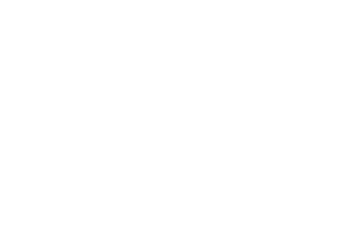

In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import csv
import numpy as np

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('data.csv', 'w', newline='')

with file:
    writer = csv.writer(file)
    writer.writerow(header)

dataset='GTZAN'
print(os.listdir(f'{dataset}'))
Genres = os.listdir(dataset)
print(Genres)
for genre in Genres:
    print(genre)
    Songs = os.listdir(f'{dataset}/{genre}')
    for song in Songs:
            filename=song
            audio_path = f"{dataset}/{genre}/{song}"
            x , sr = librosa.load(audio_path,mono=True,duration=25)
            y=x
            X = librosa.stft(x)
            Xdb = librosa.amplitude_to_db(abs(X))
            plt.axis('off')
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            rmse = librosa.feature.rmse(y=y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {genre}'
            file = open('data.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
            print('\t'+song+" DONE")

# Extract features from the dataset

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("data.csv",encoding='cp1252')
data.shape
#data.drop('filename',axis=1)
print(data.head())
y= LabelEncoder().fit_transform(data.iloc[:,-1])
X = StandardScaler().fit_transform(np.array(data.iloc[:,1:-1]))

print(y.shape,X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(len(y_train),len(y_test))

print(X_train.shape,y_train.shape,y)

          filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.wav     0.347523  0.132150        1786.624252   
1  blues.00001.wav     0.343322  0.095119        1557.480322   
2  blues.00002.wav     0.363003  0.171518        1521.379939   
3  blues.00003.wav     0.403091  0.140975        1068.938559   
4  blues.00004.wav     0.309159  0.092470        1856.497345   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         2026.511203  3860.441466            0.079594 -112.944134   
1         2054.078610  3619.997361            0.057574 -208.952174   
2         1719.041870  2984.787863            0.073594  -94.604200   
3         1586.365398  2192.617908            0.033571 -200.031107   
4         1760.413700  3621.486891            0.102904 -160.772938   

        mfcc2      mfcc3  ...    mfcc12    mfcc13    mfcc14    mfcc15  \
0  121.280694 -17.196750  ...  9.436965 -3.937524  5.771738 -5.245462   
1  122.807581   8.756976  ...  6.422412 -1.69550

# Build the model

In [4]:
#The test model
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation

model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
rmsprop=tf.keras.optimizers.RMSprop(learning_rate=0.2, rho=0.9)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=20)
#print(X_test[:1],y_test)
pred = model.predict_classes(X_test)
print(pred)
print(y_test)

Train on 700 samples
Epoch 1/20
700/700 [==============================] - 4s 6ms/sample - loss: 1.9891 - sparse_categorical_accuracy: 0.2943
Epoch 2/20
700/700 [==============================] - 1s 1ms/sample - loss: 1.5395 - sparse_categorical_accuracy: 0.4471
Epoch 3/20
700/700 [==============================] - 1s 1ms/sample - loss: 1.3661 - sparse_categorical_accuracy: 0.4929
Epoch 4/20
700/700 [==============================] - 1s 1ms/sample - loss: 1.2544 - sparse_categorical_accuracy: 0.5500
Epoch 5/20
700/700 [==============================] - 1s 1ms/sample - loss: 1.0595 - sparse_categorical_accuracy: 0.6471
Epoch 6/20
700/700 [==============================] - 1s 1ms/sample - loss: 1.0231 - sparse_categorical_accuracy: 0.6514
Epoch 7/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.8542 - sparse_categorical_accuracy: 0.7000 0s - loss: 0.7983 - sparse_categorical_accura
Epoch 8/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.7378 - s

In [5]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)
#print('test_loss: ',test_loss)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc:  0.6533333


# Best accuracy

In [6]:
#test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)
print('test_loss: ',test_loss)

test_acc:  0.6533333
test_loss:  2.1567060057322185


# Save the model

In [23]:
loc = "saved_models"
tf.keras.models.save_model(model, loc)
model.save("model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models\assets


# Load Model

In [38]:
import tensorflow_hub as hub
import numpy as np
import pandas as pd
loc = "saved_models"
new_model = tf.keras.models.load_model(loc,
custom_objects={'KerasLayer':hub.KerasLayer})

# Test model

In [8]:
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder, StandardScaler
new_model = model


theString = ["0.3595172803692916,0.04380025714635849,1365.710742222286,1643.935571084307,2725.445556640625,0.06513807508680555,-273.0061247040518,132.66331747988934,-31.86709317807114,44.21442952318603,4.335704872427025,32.32360339344842,-2.4662076330637714,20.458242724823684,-4.760171779927926,20.413702740993585,3.69545905318442,8.581128171784677,-15.601809275025104,5.295758930950924,-5.270195074271744,5.895109210872318,-6.1406603018722645,-2.9278519508415286,-1.9189588023091468,5.954495267889836",
            "0.33413845747468385,0.02121247537434101,2187.1177960161585,2371.037017119126,5059.505208333333,0.07946551287615741,-327.8964191763646,88.49354372352491,-4.651917114478277,60.494855099855265,-0.8843921224915671,13.540373024489472,-26.250884769365662,21.29933733836654,-20.82160186297754,12.975581144949778,-12.47863163597561,1.859163451964088,-14.698766821443108,-2.736799565521362,-7.542365477476807,-0.5018977706247959,-6.519690112502688,-0.49418747693106657,-5.660400223403326,-4.495506836183844",
            "0.49056045454508124,0.11272696405649185,2794.5571939659444,2859.1574633363884,5991.61376953125,0.10219319661458333,-101.35060367185021,76.69411223351757,9.330434037137854,14.829476860483213,10.506611375993648,16.688794095716382,3.4474442569555634,3.752170627213399,6.738799578115864,6.721023203559076,3.265134443860023,2.0129993261317947,3.0729342788104543,3.895392488506994,2.96256376218654,1.2687852378409676,-2.597564045132193,2.6010964058282413,-1.2407959708305987,-0.5437329496439187",
            "0.42811474395211957,0.1460435688495636,2830.3270754224327,3309.5695048388525,7233.7107340494795,0.07817925347222222,-103.63169726700575,78.46499508906538,28.566530265820568,22.532835026929547,20.78831805726373,1.430328640092866,9.116652158794523,3.4421905599252427,9.084889066694501,2.129821570193592,3.6334116215583747,5.5311464659349205,4.202789823137807,3.7352261330569707,0.20625945490756975,1.2238635179321025,1.851048338564436,0.6192016809083627,-1.0554453937439026,-1.633621077534561",
            "0.48093542013732904,0.10466829687356949,2887.7616718338472,2559.3482083164376,6086.0707600911455,0.14599609375,-109.35235827786713,71.7150370373459,-13.072355173356527,54.02192425043272,-4.226015240930529,38.18503834480247,-16.48365214313494,32.12343193453901,-11.466521260614627,17.516115897800294,-10.253031441104529,16.054891700039047,-6.406599013860771,6.666546220177415,-8.461471036220596,6.495552805836917,-6.002727515699104,-0.3304619167889349,-5.373598135610952,2.394150681582516",
            "0.27703011878074557,0.11200398206710815,2227.849146074581,2429.276432187305,4469.9839274088545,0.09056712962962964,-162.8954241260934,79.15280368186008,-2.417423175316254,39.59947883099553,3.973107110755953,-8.471402165675235,4.521493184141745,6.652590547557736,-13.863104681839442,-7.441324622180053,4.681828637450696,-1.247808583453883,2.345332130880664,0.4074968979537844,-7.44969040015772,-8.537668204654247,-4.797973977072894,-5.280747362279262,-7.780363951600931,-5.898098436483338"]
input_data2 = np.array(X_test)
scaler=StandardScaler().fit(np.array(data.iloc[:,1:-1]))

input_data2 = scaler.transform(input_data2)

tf_model_predictions = new_model.predict(input_data2)
df = DataFrame(data, columns= ['label'])
df = DataFrame.drop_duplicates(df)
print(df)

dataset_labels = df

tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

         label
0        blues
100  classical
200    country
300      disco
400     hiphop
500       jazz
600      metal
700        pop
800     reggae
900       rock
Prediction results for the first elements


,"(blues,)","(classical,)","(country,)","(disco,)","(hiphop,)","(jazz,)","(metal,)","(pop,)","(reggae,)","(rock,)"
0,1.333897e-15,1.356065e-10,2.352827e-11,5.429954e-19,5.953764e-22,1.000000e+00,3.754177e-21,2.785140e-18,1.061165e-16,3.012523e-18
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090725e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,3.525706e-33,1.000000e+00,0.000000e+00,0.000000e+00,4.649303e-36,1.342883e-31,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# Predicted Labels

pred: [5 5 1 4 5 5 5 5 5 5 1 3 3 5 8 5 5 1 5 5 6 5 4 1 4 5 1 6 5 4 5 5 5 8 1 5 4
 4 5 8 6 4 8 5 1 1 5 5 5 5 8 5 5 5 4 4 5 6 0 0 1 1 5 4 5 5 0 5 4 5 4 5 5 1
 5 1 5 0 4 5 4 5 5 4 5 1 1 5 5 5 5 5 1 1 1 1 8 0 4 4 4 2 5 0 5 5 5 5 5 4 2
 5 4 5 5 1 1 1 4 4 4 8 4 1 5 0 1 8 4 5 5 4 5 5 8 5 8 5 4 5 1 4 5 1 5 5 1 5
 0 8 4 5 5 4 5 3 5 5 4 5 8 4 1 1 0 5 4 4 4 1 4 5 5 5 4 5 5 5 4 1 5 5 5 4 4
 5 4 5 1 1 5 0 1 5 1 5 8 1 0 1 1 5 5 5 4 1 5 4 8 0 5 5 4 4 4 5 3 5 3 4 5 4
 1 4 5 1 1 4 5 4 1 4 5 6 8 5 1 1 4 5 1 4 5 5 5 1 4 5 5 1 4 5 4 3 1 4 5 5 4
 1 5 0 5 5 5 1 1 1 5 5 4 1 1 5 5 1 4 4 5 4 8 1 5 5 5 5 4 4 3 6 5 1 1 1 5 4
 4 4 5 1]
true: [9 0 5 6 5 5 5 5 8 0 6 6 4 5 3 0 8 3 8 2 4 1 8 9 4 1 7 6 7 3 3 0 1 9 7 2 9
 4 1 8 3 6 8 9 9 3 9 1 0 2 3 2 9 2 3 7 2 6 7 7 7 2 5 4 9 5 2 2 8 0 8 5 2 8
 9 9 5 2 8 1 4 8 5 6 5 4 5 7 2 2 0 5 0 3 7 6 8 7 9 7 6 2 0 0 5 1 7 9 5 3 8
 8 7 2 2 6 7 4 6 7 7 9 4 0 9 8 3 0 3 8 1 4 2 1 4 2 8 3 7 1 8 8 8 5 5 5 6 9
 0 5 7 1 9 4 0 3 3 5 6 0 8 7 9 9 9 2 0 3 6 6 7 5 1 0 0 0 0 2 3 3 0 9 1 7 4
 2 

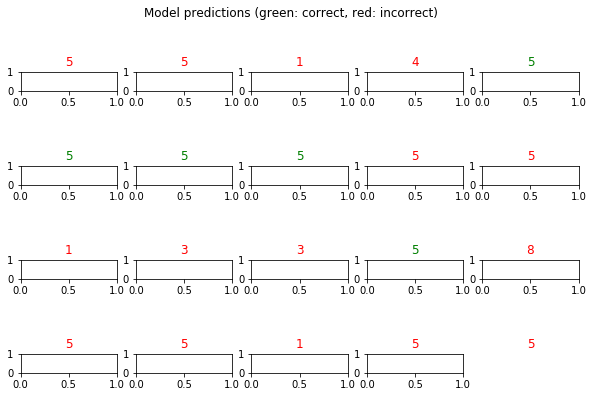

In [9]:
import matplotlib.pyplot as plt
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
print("pred:",predicted_ids)
print("true:",y_test)
#predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=4)
for n in range(20):
    plt.subplot(6,5,n+1)
    color = "green" if predicted_ids[n] == y_test[n] else "red"
    plt.title(predicted_ids[n], color=color)
plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

# Convert keras model to tflite

In [10]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
'''
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
'''
tflite_model = converter.convert()
open("converted_model_latest.tflite", "wb").write(tflite_model)

11408580

# Check input/output shapes

In [16]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[ 1 26]
<class 'numpy.float32'>
[ 1 10]
<class 'numpy.float32'>


In [87]:
print(tf.__version__)

2.0.0


# Store scaling parameters

In [11]:
scaler=StandardScaler().fit(np.array(data.iloc[:,1:-1]))
means = scaler.mean_ 
vars = scaler.var_ 
print(means)

[ 3.79009496e-01  1.30230816e-01  2.20073893e+03  2.24356442e+03
  4.57064608e+03  1.03321814e-01 -1.45652995e+02  9.96075777e+01
 -8.78826708e+00  3.64646155e+01 -1.13902293e+00  1.47444637e+01
 -5.19256525e+00  1.01405519e+01 -7.03695045e+00  7.76662123e+00
 -6.02199984e+00  4.51204959e+00 -4.82159712e+00  1.77942125e+00
 -3.90880896e+00  1.11979527e+00 -4.04873392e+00  4.88967726e-01
 -2.35055279e+00 -1.04871850e+00]


## Save scaler with fitting parameters

In [51]:
import pickle,os
scaler=StandardScaler().fit(np.array(data.iloc[:,1:-1]))
file = open("scaler.ok","wb")
pickle.dump(scaler,file)